# LazySP

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import time
from copy import deepcopy
from IPython import display
np.random.seed(0)

## Describe Environment & Graph

In [2]:
W = 100
start = [5,5]
goal = [95,95]
step_size = 1
obstacles = [[[10,10], [10,10]], [[20,50], [50,20]], [[65,30], [15,20]], [[30,20], [40,20]]]

def h(n1, n2):
    return np.linalg.norm(np.array(n1) - np.array(n2))

# randomly select N points in the world
res = 5
graph = {}
for x in range(0, W, res):
    for y in range(0, W, res):
        graph[(x, y)] = [(x-res, y), (x, y-res), (x+res, y), (x, y+res)]

start = (10, 0)
goal = (90, 90)

In [3]:
def plot(start, goal, path=None):
    ax = plt.gca()
    for o in obstacles:
        rect = plt.Rectangle(o[0], width=o[1][0], height=o[1][1], fc='y')
        ax.add_patch(rect)

    if path:
        xs = []
        ys = []
        for n in path:
            xs.append(n[0])
            ys.append(n[1])
        plt.plot(xs, ys, c='r', linewidth=1)

    ax.add_patch(plt.Circle(start, radius=1, fc='k'))
    ax.add_patch(plt.Circle(goal, radius=1, fc='g'))

    plt.xlim(0, W)
    plt.ylim(0, W)
    plt.axis('equal')
    #plt.show()

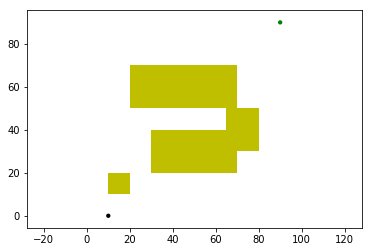

In [8]:
plot(start, goal)

## A Star

In [5]:
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from.keys():
        current_ = came_from[current]
        total_path.append(current_)
        current = current_
    return total_path[-1::-1]

def find_shortest_path(graph, start, goal):
    """
    graph: {(x1, y1): [(x2, y2), (x3,y3), ...], ...}
    start: (x, y)
    goal: (x, y)
    """
    open_set = [start]
    closed_set = []
    came_from = {}
    g = dict([(n, 1e9) for n in graph.keys()])
    g[start] = 0
    f = dict([(n, 1e9) for n in graph.keys()])
    f[start] = h(start, goal)
    
    while len(open_set) != 0:
        current = open_set[0]
        for o in open_set:
            if f[o] < f[current]:
                current = o
        open_set.remove(current)
        
        if current not in graph:
            print("ERROR:", current)
            continue
        
        if current == goal:
            return reconstruct_path(came_from, current)
            
        closed_set.append(current)
        
        for neighbor in graph[current]:
            if neighbor in closed_set:
                continue
            tentative_g = g[current] + 1
            if neighbor not in open_set:
                open_set.append(neighbor)
            elif g[neighbor] <= tentative_g:
                continue
                
            g[neighbor] = tentative_g
            f[neighbor] = g[neighbor] + h(neighbor, goal)
            came_from[neighbor] = current

## The Main Loop

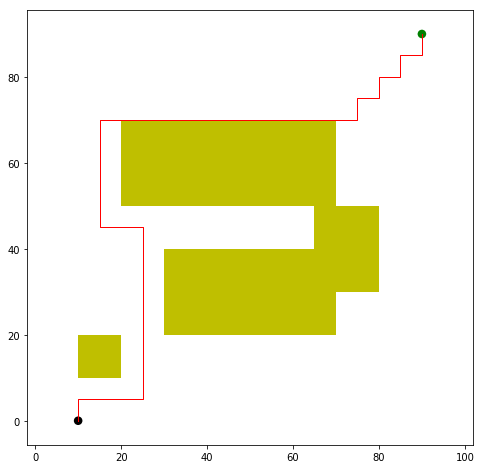

DONE!


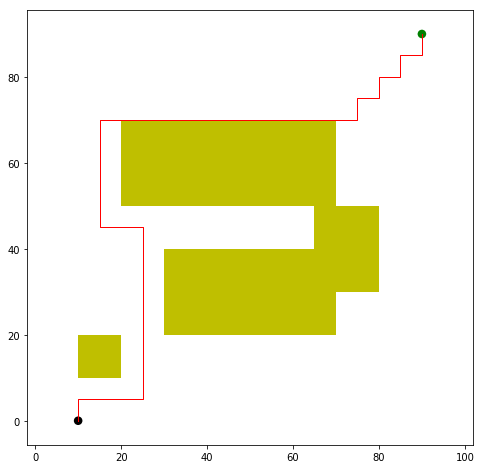

In [7]:
def invalid_edge(p):
    for o in obstacles:
        nx = p[0]
        ny = p[1]
        ox1 = o[0][0]
        oy1 = o[0][1]
        ox2 = o[0][0] + o[1][0]
        oy2 = o[0][1] + o[1][1]
        if ox1 <= nx <= ox2 and oy1 <= ny <= oy2:
            return True
    return False

n = start
mutable_graph = deepcopy(graph)
plt.figure(figsize=(8,8))
while True:
    # optimistically plan shortest path
    path = find_shortest_path(mutable_graph, start, goal)
    
    # select an edge to remove
    done = True
    for i in range(len(path)-1):
        n = path[i]
        n_ = path[i+1]
        if invalid_edge(n_):
            # remove invalid edge!
            mutable_graph[n].remove(n_)
            done = False
            break
            
    if done:
        print("DONE!")
        break
    
    plt.clf()
    plot(start, goal, path)
    display.clear_output(wait=True)
    display.display(plt.gcf())